In [2]:
import sys
import os
import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# import dateutil
# from scipy import __version__ as scipy_version
# import scipy.interpolate
# import scipy.stats
# from statsmodels import __version__ as statsmodels_version
# import statsmodels.formula.api as smformula

from collections import OrderedDict
from IPython.display import display, HTML

print(sys.version)
print('numpy', np.__version__)
print('matplotlib', mpl.__version__)
print('pandas',pd.__version__)
# print('scipy', scipy_version)
# print('statsmodels', statsmodels_version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
numpy 1.14.3
matplotlib 2.2.2
pandas 0.22.0


In [3]:
# Setup plot style
%matplotlib notebook
plt.style.use('seaborn-paper')
mpl.rcParams['figure.facecolor'] = (0.8, 0.8, 0.8, 1)

In [4]:
df = pd.read_csv('log3.log', header=None, sep='\t',
                 names=['time','T','RH','AC','heat','humid','dehumid'])
df.index = pd.to_datetime(df['time'])

In [10]:
df

,time,T,RH,AC,heat,humid,dehumid
time,,,,,,,
2018-08-19 01:23:21.453282,2018-08-18T15:23:21.453282-10:00,22.858396,55.725948,False,False,True,False
2018-08-19 01:23:31.473699,2018-08-18T15:23:31.473699-10:00,22.845045,55.782406,False,False,True,False
2018-08-19 01:23:41.502692,2018-08-18T15:23:41.502692-10:00,22.802319,55.986877,False,False,True,False
2018-08-19 01:23:51.531664,2018-08-18T15:23:51.531664-10:00,22.788968,56.632334,False,False,True,False
2018-08-19 01:24:01.560686,2018-08-18T15:24:01.560686-10:00,22.788968,56.325628,False,False,True,False
2018-08-19 01:24:11.589676,2018-08-18T15:24:11.589676-10:00,22.802319,56.211185,False,False,True,False
2018-08-19 01:24:21.618685,2018-08-18T15:24:21.618685-10:00,22.788968,56.220340,False,False,True,False
2018-08-19 01:24:31.647685,2018-08-18T15:24:31.647685-10:00,22.788968,56.279850,False,False,True,False
2018-08-19 01:24:41.676702,2018-08-18T15:24:41.676702-10:00,22.802319,56.293584,False,False,True,False


<IPython.core.display.Javascript object>


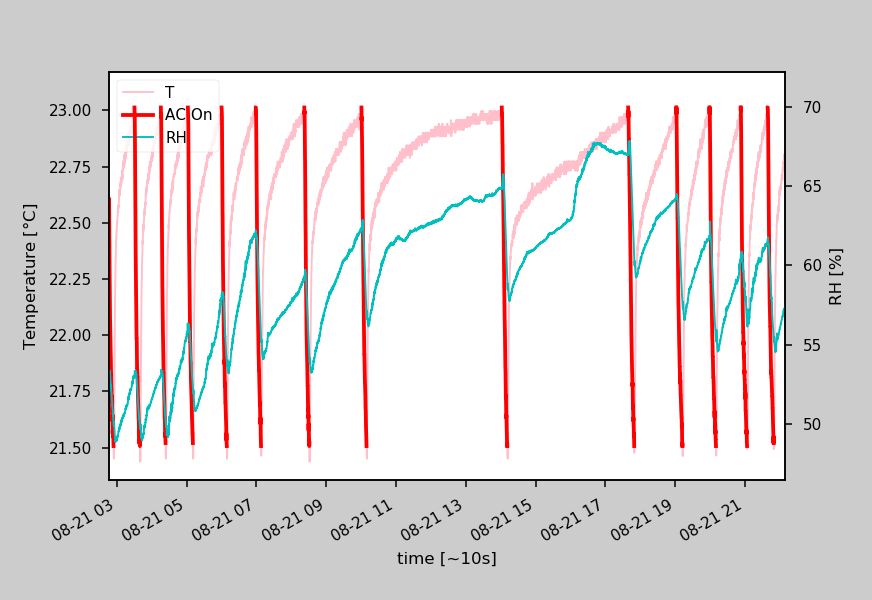

Text(0,0.5,'RH [%]')

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()

ax.plot(df.index, df['T'], ls='-', color='pink', label='T', lw=1)
ax2.plot(df.index, df['RH'], 'c-', label='RH', lw=1)

d = df.copy()
d.loc[~d['AC']] = np.nan
ax.plot(d.index, d['T'], 'r-', label='AC On', lw=2, zorder=6)

handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles+handles2, labels+labels2, loc='upper left')
fig.autofmt_xdate()
ax.set_xlabel('time [~10s]')
ax.set_ylabel('Temperature [$\mathrm{\degree C}$]')
ax2.set_ylabel('RH [%]')